### Question1: 
Suppose that Coke and Pepsi are fighting for the cola market. Each week each person in the market buys one case of Coke or Pepsi. If the person’s last purchase was Coke, there is a 0.90 probability that this person’s next purchase will be Coke; otherwise, it will be Pepsi. (You can assume that there are only two brands in the market.) Similarly, if the person’s last purchase was Pepsi, there is a 0.80 probability that this person’s next purchase will be Pepsi; otherwise, it will be Coke. Currently half of all people purchase Coke, and the other half purchase Pepsi. Simulate one year (52 weeks) of sales in the cola market and estimate each company’s average weekly market share and each com- pany’s ending market share in week 52. Do this by assuming that the total market size is fixed at 100,000 customers.

##### Libraries needed to run this notebook

In [31]:
import simpy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##### Data generation using simulation
- Below code simulates the market of 100000 customer for 100 times for data generation

In [41]:
CustomerCount=100000
NumberOfIterations=100
ListSampleProbMeans=[]
ListofLastWeekProb=[]


def customer(env,marketLst):
    '''
    This functions helps to generate each customer 52 weeks of buying pattern
    Arguments
        env : Experiement Environment
        marketLst: Capture all customers buying item in list

    '''
    while True:
        itemCheck=[]
        proba= np.random.normal(1,0.5,52) # This function generates sequence of 52  weekly buying patterns with mean =1 and standard deviation=0.5
        for i,value in enumerate(proba):
            if i>=1:
                if itemCheck[i-1]=='Coke':
                    itemCheck.append('Coke' if value>=0.1 else 'Pepsi')
                elif itemCheck[i-1]=='Pepsi':
                    itemCheck.append('Pepsi' if value>=0.2 else 'Coke')
            else:
                itemCheck.append('Coke' if value>=0.5 else 'Pepsi')
        marketLst.append(itemCheck)
        yield env.timeout(1) ## This helps to getout of the loop

for iter in range(NumberOfIterations):
    # print(f"Iteration of {iter} is started")
    marketLst=[]
    env = simpy.Environment()
    env.process(customer(env,marketLst))
    env.run(until=CustomerCount)
    # print(marketCheck)
    MarketData=pd.DataFrame(marketLst,columns=list(range(52)))
    # print(MarketData.columns)
    NoOfCokes=MarketData.eq('Coke').sum(axis=1)
    ListProbabilities=list(round(NoOfCokes/MarketData.shape[1],2))
    LstweekProb=sum(list(round(MarketData.iloc[:,-2:-1].eq('Coke').sum(axis=1))))/MarketData.shape[0]
    # print(MarketData.shape)
    ListSampleProbMeans.append(np.mean(ListProbabilities))
    ListofLastWeekProb.append(LstweekProb)
print(f"Simulation is completed for {iter+1} rounds")

Simulation is completed for 100 rounds


In [3]:
MarketSimdata=pd.DataFrame(data=ListSampleProbMeans,columns=["Sample Means"])
MarketSimdata['LastWeekCokeProb']=ListofLastWeekProb
MarketSimdata.head(10)
MarketSimdata.describe()

##### Random Sample Generation
Generate 40 random samples of each size 70 from above experiement 
calculate  the mean, variance and standard deviation of total sample means

In [28]:
CokeShareSampleMean,CokeLastweekShareSampleMean=[],[]
for i in range(40):
    MarketShareSample=MarketSimdata.sample(n=70,random_state=i)
    CokeShareSampleMean.append(MarketShareSample['Sample Means'].mean()*100)
    CokeLastweekShareSampleMean.append(MarketShareSample['LastWeekCokeProb'].mean()*100)

CokeFinalShareData=pd.DataFrame(data={'CokeShareSampleMean':CokeShareSampleMean,'CokeLastWeekShareSampleMean':CokeLastweekShareSampleMean})
CokeFinalShareData.describe(percentiles=[0.05,0.1,0.5,0.90,0.95]).T

,count,mean,std,min,5%,10%,50%,90%,95%,max
CokeShareSampleMean,40.0,65.386582,0.006390,65.375070,65.376158,65.377751,65.387224,65.394864,65.395939,65.398501
CokeLastWeekShareSampleMean,40.0,60.630616,0.012442,60.604214,60.611397,60.613581,60.630564,60.646040,60.650819,60.653714


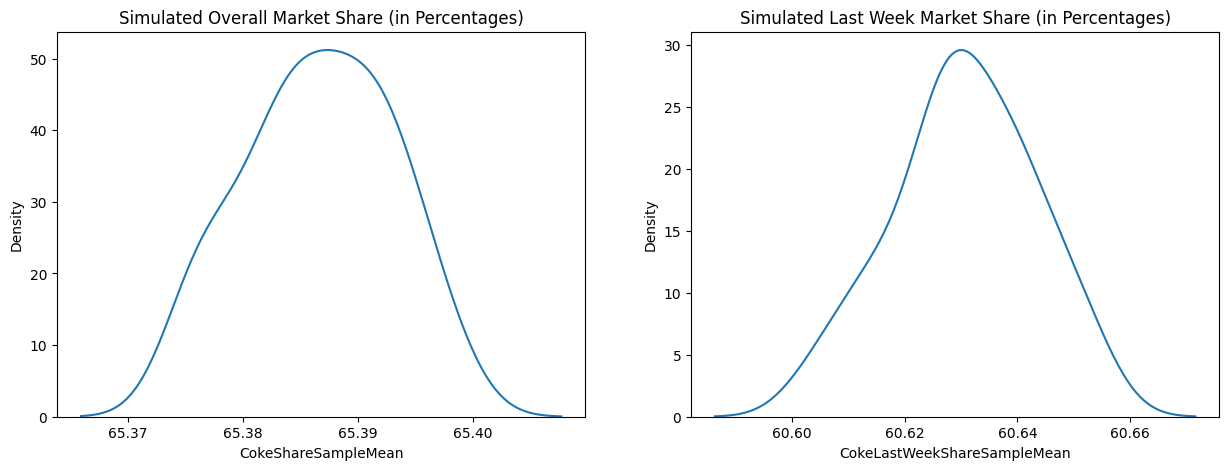

In [30]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(CokeFinalShareData['CokeShareSampleMean'],ax=ax[0])
ax[0].set_title("Simulated Overall Market Share (in Percentages)")
sns.kdeplot(CokeFinalShareData['CokeLastWeekShareSampleMean'],ax=ax[1])
ax[1].set_title("Simulated Last Week Market Share (in Percentages)")
plt.show()